# COVID Infections prediction with Logistics regrassion (Sigmoidal)

In [ ]:
Autor: Renan Luiz Andrade Vital 
email: vitalrenan@icloud.com    
tel: +5513 9913.42600  
Certificação MTA 98-381

""" 
    This is a machine learning model created with educational purposes. 
    
    This model uses logistic regression in order to predict if an individual is infected by covid-19 based on trained
    data from features of infected people. All the data generated in this report is fake. 

"""

In [1]:
#This model uses the libs: Pandas, Numpy, Matplotlib and sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Importing the data with pandas
df = pd.read_excel('infeccao.xlsx')
df.head()

,regiao,idade,peso,sexo,transporte próprio,plano de saude,emprego,social,covid
0,N,20,60,H,N,0,0.0,D,1
1,N,25,65,M,N,0,NaN,C,1
2,N,30,70,H,N,0,NaN,C,0
3,N,40,75,M,S,0,NaN,D,0
4,N,50,65,H,N,1,NaN,B,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   regiao              156 non-null    object 
 1   idade               156 non-null    int64  
 2   peso                156 non-null    int64  
 3   sexo                156 non-null    object 
 4   transporte próprio  156 non-null    object 
 5   plano de saude      156 non-null    int64  
 6   emprego             1 non-null      float64
 7   social              156 non-null    object 
 8   covid               156 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 11.1+ KB


In [3]:
df.describe()

,idade,peso,plano de saude,emprego,covid
count,156.000000,156.000000,156.000000,1.0,156.000000
mean,47.083333,71.615385,0.455128,0.0,0.576923
std,18.716547,14.476883,0.499586,NaN,0.495639
min,20.000000,50.000000,0.000000,0.0,0.000000
25%,30.000000,65.000000,0.000000,0.0,0.000000
50%,45.000000,70.000000,0.000000,0.0,1.000000
75%,60.000000,80.000000,1.000000,0.0,1.000000
max,90.000000,100.000000,1.000000,0.0,1.000000


In [4]:
#The employment data is incomplete, therefore I droped this col
df.drop(["emprego"], axis=1, inplace=True)
df.head()

,regiao,idade,peso,sexo,transporte próprio,plano de saude,social,covid
0,N,20,60,H,N,0,D,1
1,N,25,65,M,N,0,C,1
2,N,30,70,H,N,0,C,0
3,N,40,75,M,S,0,D,0
4,N,50,65,H,N,1,B,1


In [5]:
#Data adjustments to transform string values in numerical values 
df.loc[df['transporte próprio'] == "N", "transporte próprio"] = int(0)
df.loc[df['transporte próprio'] == "S", "transporte próprio"] = int(1)
df.loc[df['sexo'] == "H", "sexo"] = 1
df.loc[df['sexo'] == "M", "sexo"] = 0

df.head()

,regiao,idade,peso,sexo,transporte próprio,plano de saude,social,covid
0,N,20,60,1,0,0,D,1
1,N,25,65,0,0,0,C,1
2,N,30,70,1,0,0,C,0
3,N,40,75,0,1,0,D,0
4,N,50,65,1,0,1,B,1


# Logistic regression - Sigmoidal

In [6]:
#Splitting data: 
#The y variable has the results (covid infection result)
#the x variable has the individuals features

X = df[['idade ', 'peso', 'transporte próprio','sexo', 'plano de saude']]
y = df['covid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
#Instantiating and fitting the data

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [8]:
#Executing the model
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.75      0.72      0.73        25

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



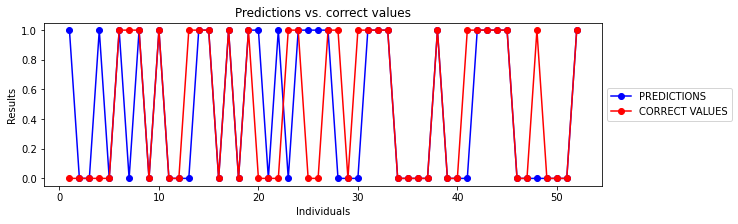

In [9]:
#Ploting the results
plt.figure(figsize=(10,3))
plt.plot(range(1,53),predictions,color='blue',marker="o", label='PREDICTIONS')
plt.plot(range(1,53),y_test,color='red',marker="o", label='CORRECT VALUES')
plt.title('Predictions vs. correct values')
plt.xlabel('Individuals')
plt.ylabel('Results')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Conclusion: The result shows that the model performed fairly in infections predictions. The accuracy of 75% and F1-score 76% reveals that the model is balanced, in other hands, it can predict fairly negative and positive results.